<a href="https://colab.research.google.com/github/Priyanka3008/StockPricePrediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
data=yf.download('AAPL',start='2008-01-01',end='2024-08-01')
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.876341  1079178800
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.879055   842066400
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.430277  1455832000
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.357593  2072193200
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.164870  1523816000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data['PriceVolume']=data['Close']*data['Volume']
data['CumPriceVolume']=data['PriceVolume'].cumsum()
data['CumVol']=data['Volume'].cumsum()
data['VWAP']=data['CumPriceVolume']/data['CumVol']
print(data.head())

                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.876341  1079178800   
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.879055   842066400   
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.430277  1455832000   
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.357593  2072193200   
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.164870  1523816000   

             PriceVolume  CumPriceVolume      CumVol      VWAP  
Date                                                            
2008-01-02  7.509542e+09    7.509542e+09  1079178800  6.958571  
2008-01-03  5.862286e+09    1.337183e+10  1921245200  6.959980  
2008-01-04  9.361519e+09    2.273335e+10  3377077200  6.731664  
2008-01-07  1.314659e+10    3.587993e+10  5449270400  6.584356  
2008-01-08  9.319767e+09    4.519970e+10  6973086400  6.482022  


In [ ]:
data=data.drop(['PriceVolume','CumPriceVolume','CumVol'],axis=1)
print(data.head())

                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.876341  1079178800   
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.879055   842066400   
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.430277  1455832000   
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.357593  2072193200   
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.164870  1523816000   

                VWAP  
Date                  
2008-01-02  6.958571  
2008-01-03  6.959980  
2008-01-04  6.731664  
2008-01-07  6.584356  
2008-01-08  6.482022  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4173 entries, 2008-01-02 to 2024-07-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4173 non-null   float64
 1   High       4173 non-null   float64
 2   Low        4173 non-null   float64
 3   Close      4173 non-null   float64
 4   Adj Close  4173 non-null   float64
 5   Volume     4173 non-null   int64  
 6   VWAP       4173 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 260.8 KB


In [ ]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
VWAP,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,VWAP
Open,1.000000,0.999914,0.999908,0.999802,0.999721,-0.521700,0.941120
High,0.999914,1.000000,0.999883,0.999908,0.999822,-0.521022,0.941136
Low,0.999908,0.999883,1.000000,0.999909,0.999836,-0.522707,0.941295
Close,0.999802,0.999908,0.999909,1.000000,0.999918,-0.521908,0.941208
Adj Close,0.999721,0.999822,0.999836,0.999918,1.000000,-0.516867,0.939510
Volume,-0.521700,-0.521022,-0.522707,-0.521908,-0.516867,1.000000,-0.662492
VWAP,0.941120,0.941136,0.941295,0.941208,0.939510,-0.662492,1.000000


<Axes: >

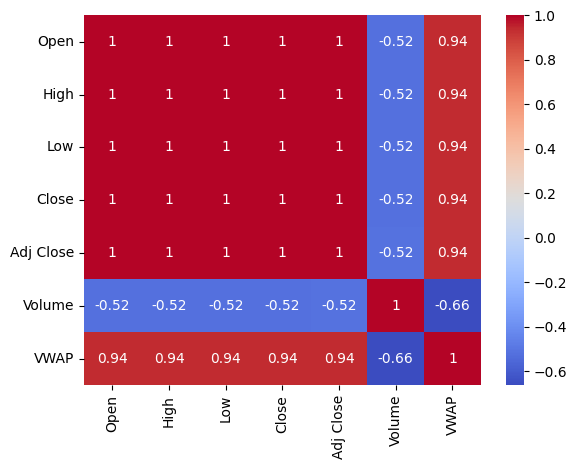

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,VWAP
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4.173000e+03,4173.000000
mean,57.822586,58.438773,57.232234,57.859043,55.869782,3.095610e+08,12.515779
std,59.620958,60.262718,59.024818,59.668702,59.815345,3.273184e+08,5.710821
min,2.835357,2.928571,2.792857,2.792857,2.358498,2.404830e+07,4.653318
25%,15.115714,15.248571,14.988571,15.091071,12.900867,9.432320e+07,7.450661
50%,29.107500,29.344999,28.860001,29.070000,26.451750,1.755400e+08,12.042968
75%,82.562500,83.400002,81.830002,83.364998,81.321404,4.189192e+08,15.782816
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.372970e+09,24.938978


In [ ]:
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
cols=['Open','High','Low','Close','Adj Close','Volume','VWAP']
data[cols]=scaler.fit_transform(data[cols])
print(data.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2008-01-02  0.018325  0.018026  0.017733  0.017954   0.015151  0.315066   
2008-01-03  0.017735  0.017589  0.017755  0.017967   0.015162  0.244263   
2008-01-04  0.017129  0.016920  0.015615  0.015677   0.013230  0.427536   
2008-01-07  0.015570  0.015487  0.014272  0.015306   0.012917  0.611583   
2008-01-08  0.015400  0.015313  0.014360  0.014323   0.012087  0.447836   

                VWAP  
Date                  
2008-01-02  0.113640  
2008-01-03  0.113709  
2008-01-04  0.102454  
2008-01-07  0.095192  
2008-01-08  0.090148  


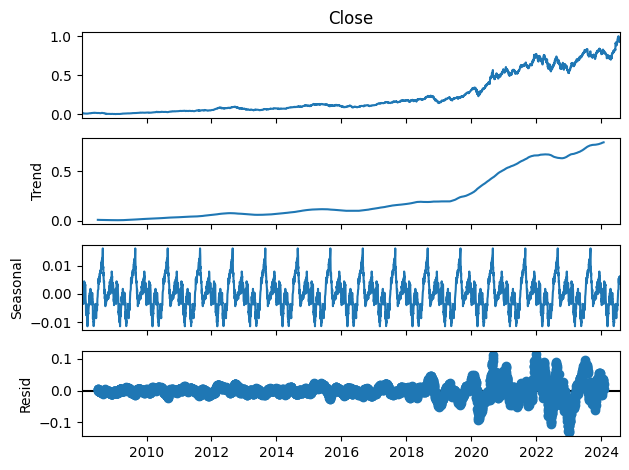

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='additive', period=252)
result.plot()
plt.show()

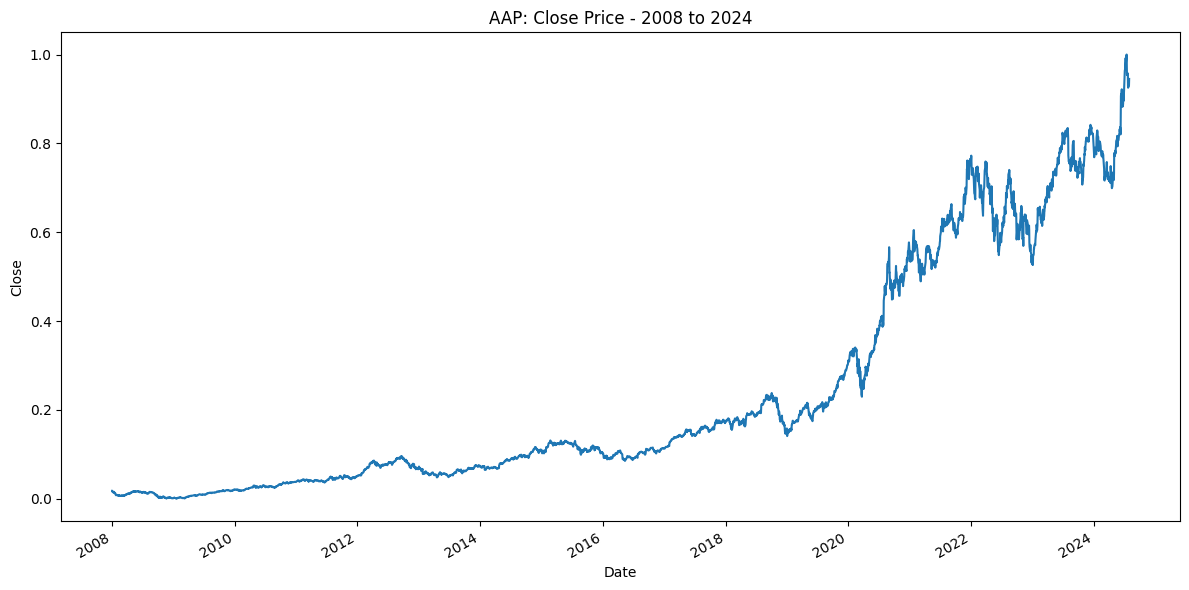

In [ ]:
plt.figure(figsize=(12, 6))
plt.title(f"AAP: Close Price - 2008 to 2024")
plt.xlabel("Date")
plt.ylabel("Close")
data["Close"].plot()
plt.tight_layout()
plt.show()

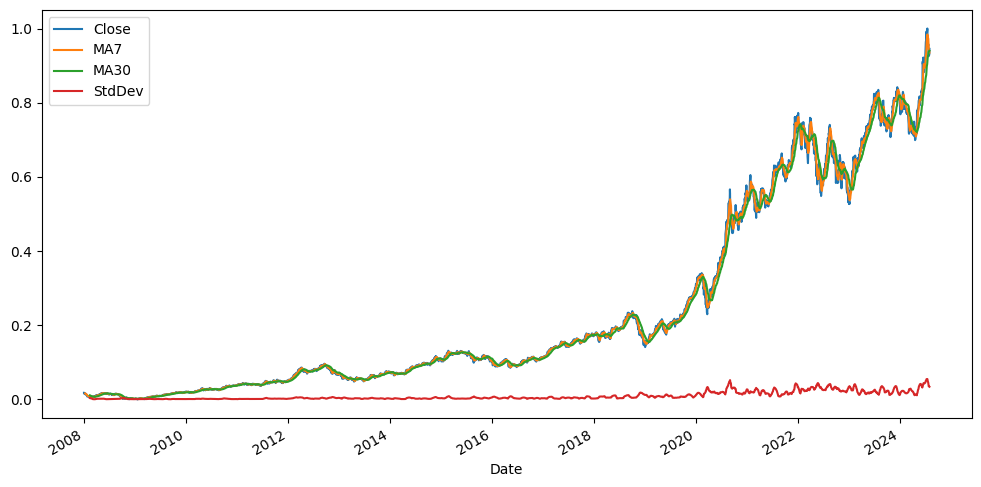

In [ ]:
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()
data['StdDev'] = data['Close'].rolling(window=30).std()

data[['Close', 'MA7', 'MA30', 'StdDev']].plot(figsize=(12, 6))
plt.show()

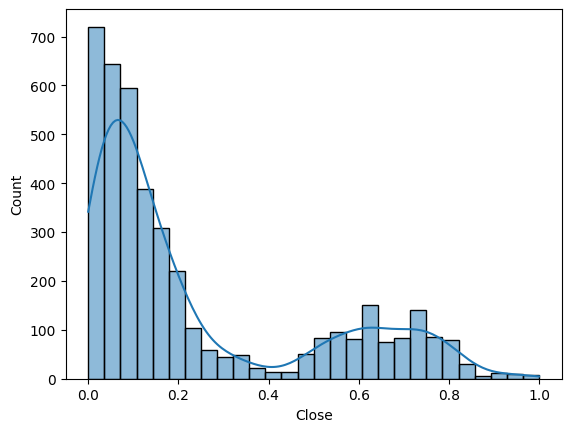

In [ ]:
sns.histplot(data['Close'], kde=True)
plt.show()

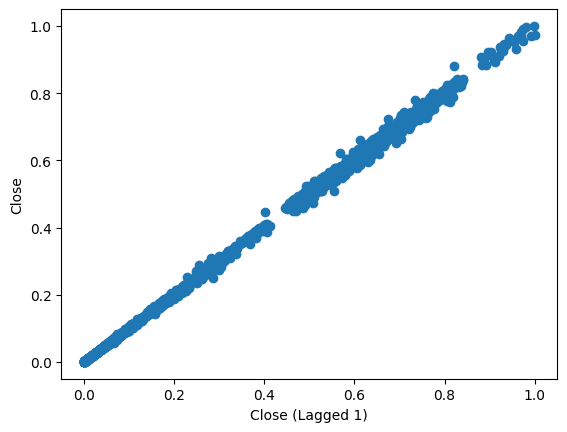

In [ ]:
plt.scatter(data['Close'].shift(1), data['Close'])
plt.xlabel('Close (Lagged 1)')
plt.ylabel('Close')
plt.show()

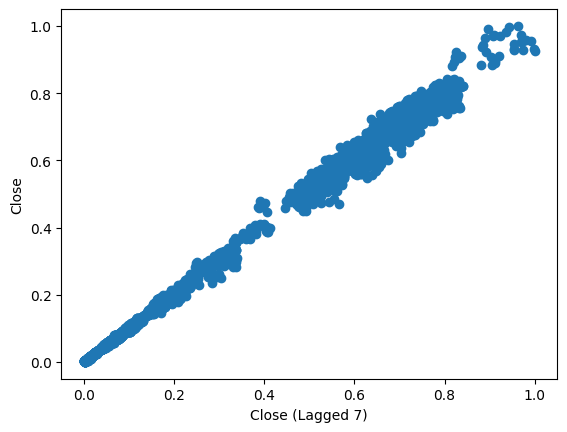

In [ ]:
plt.scatter(data['Close'].shift(7), data['Close'])
plt.xlabel('Close (Lagged 7)')
plt.ylabel('Close')
plt.show()

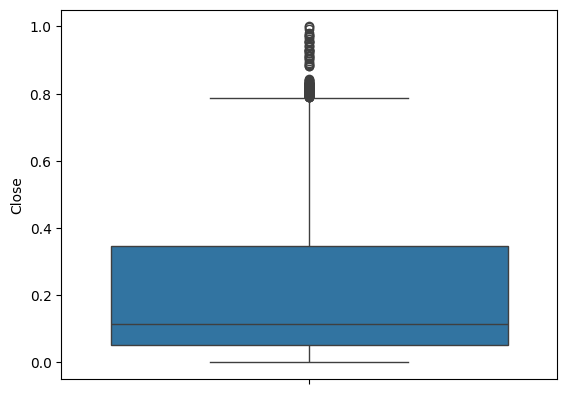

In [ ]:
sns.boxplot(data['Close'])
plt.show()

In [ ]:
from scipy import stats
z_scores = stats.zscore(data['Close'])
outliers = data['Close'][abs(z_scores) > 3]
print(outliers)

Series([], Name: Close, dtype: float64)


In [ ]:
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = data['Close'][((data['Close'] < (Q1 - 1.5 * IQR)) | (data['Close'] > (Q3 + 1.5 * IQR)))]
print(outliers.count())

141


In [ ]:
filtered_data = data[~((data['Close'] < (Q1 - 1.5 * IQR)) | (data['Close'] > (Q3 + 1.5 * IQR)))]

In [ ]:
filtered_data.loc[:,'Close_Lag1'] = filtered_data['Close'].shift(1)
filtered_data.loc[:,'Close_Lag5'] = filtered_data['Close'].shift(5)
filtered_data.loc[:,'Close_Lag180'] = filtered_data['Close'].shift(180)
filtered_data = filtered_data.dropna()

<ipython-input-24-912654939447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:,'Close_Lag1'] = filtered_data['Close'].shift(1)
<ipython-input-24-912654939447>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:,'Close_Lag5'] = filtered_data['Close'].shift(5)
<ipython-input-24-912654939447>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
filtered_data.head()

,Open,High,Low,Close,Adj Close,Volume,VWAP,MA7,MA30,StdDev,Close_Lag1,Close_Lag5,Close_Lag180
Date,,,,,,,,,,,,,
2008-09-18,0.007823,0.008144,0.006588,0.008603,0.007260,0.493354,0.045956,0.009850,0.013192,0.002215,0.007639,0.011460,0.017954
2008-09-19,0.009662,0.009481,0.009012,0.009653,0.008146,0.420084,0.045752,0.009615,0.013076,0.002307,0.008603,0.010889,0.017967
2008-09-22,0.009256,0.008879,0.008135,0.008135,0.006865,0.248637,0.045554,0.009140,0.012879,0.002468,0.009653,0.009568,0.015677
2008-09-23,0.008019,0.008201,0.007515,0.007487,0.006318,0.375141,0.045212,0.008654,0.012639,0.002631,0.008135,0.009494,0.015306
2008-09-24,0.007319,0.007461,0.007281,0.007775,0.006561,0.305462,0.044953,0.008398,0.012393,0.002730,0.007487,0.007639,0.014323


In [ ]:
from sklearn.model_selection import train_test_split
y=filtered_data['Close']
X=filtered_data.drop('Close',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train.head()

,Open,High,Low,Adj Close,Volume,VWAP,MA7,MA30,StdDev,Close_Lag1,Close_Lag5,Close_Lag180
Date,,,,,,,,,,,,
2017-02-24,0.133289,0.133317,0.134727,0.126854,0.018829,0.384816,0.134741,0.125645,0.007390,0.135069,0.133797,0.094567
2016-07-21,0.094683,0.095268,0.095484,0.088059,0.031879,0.370124,0.094713,0.092188,0.002223,0.095666,0.094406,0.118530
2014-11-21,0.113600,0.112948,0.113830,0.101672,0.061115,0.306106,0.111703,0.103529,0.006327,0.113283,0.110988,0.069684
2019-01-28,0.154560,0.154305,0.154679,0.150757,0.024103,0.463409,0.155225,0.155333,0.006485,0.157943,0.156931,0.189836
2011-08-08,0.043152,0.043560,0.042619,0.035722,0.334372,0.102518,0.046738,0.044731,0.003395,0.045472,0.049032,0.035438


In [ ]:
X_test.head()

,Open,High,Low,Adj Close,Volume,VWAP,MA7,MA30,StdDev,Close_Lag1,Close_Lag5,Close_Lag180
Date,,,,,,,,,,,,
2021-06-23,0.560401,0.560780,0.566386,0.555333,0.010799,0.680850,0.555643,0.536603,0.012742,0.565396,0.548889,0.490060
2010-07-14,0.025984,0.026492,0.026488,0.022670,0.235299,0.043861,0.027254,0.027812,0.001371,0.026721,0.027778,0.019354
2009-11-12,0.018916,0.018729,0.019110,0.016079,0.101431,0.009402,0.018503,0.017867,0.000965,0.019248,0.017829,0.001710
2024-01-11,0.786257,0.785831,0.785191,0.786123,0.007489,0.944072,0.782094,0.812716,0.020948,0.785887,0.782051,0.573843
2015-05-26,0.129747,0.129316,0.128040,0.115311,0.077261,0.331022,0.128439,0.126065,0.002430,0.130770,0.128238,0.094599


In [ ]:
y_train.head()

,Close
Date,
2017-02-24,0.135209
2016-07-21,0.095095
2014-11-21,0.113455
2019-01-28,0.156370
2011-08-08,0.042330


In [ ]:
y_test.head()

,Close
Date,
2021-06-23,0.564189
2010-07-14,0.026864
2009-11-12,0.019054
2024-01-11,0.787827
2015-05-26,0.127624


In [ ]:
pip install pmdarima

<Axes: xlabel='Date'>

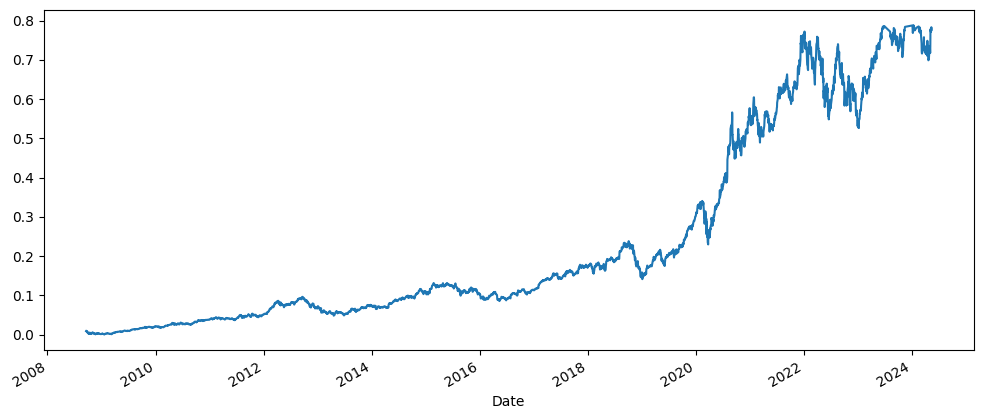

In [ ]:
filtered_data['Close'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-Value: ",dftest[1])
    print("3. Num of Lags: ",dftest[2])
    print("4. Num of Observations Used: ",dftest[3])
    for key,val in dftest[4].items():
        print("\t",key,":",val)

In [ ]:
ad_test(filtered_data['Close'])

1. ADF:  0.9246673331490738
2. P-Value:  0.9934039438613294
3. Num of Lags:  30
4. Num of Observations Used:  3821
	 1% : -3.4320625617721574
	 5% : -2.862296715736547
	 10% : -2.567172809512658


In [ ]:
mean=filtered_data.rolling(window=12).mean()
std=filtered_data.rolling(window=12).std()


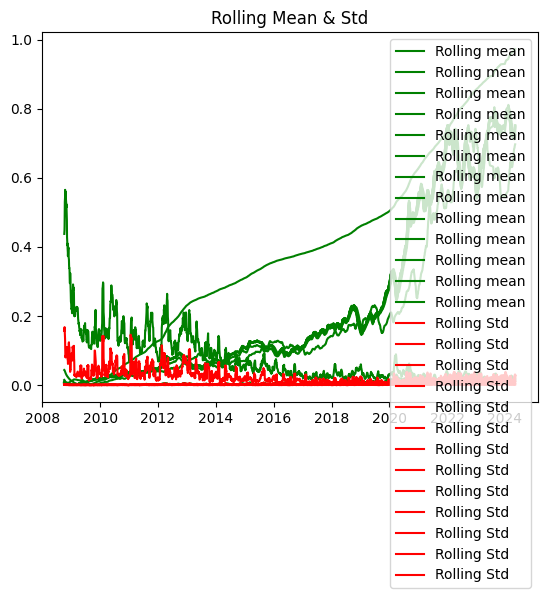

In [ ]:
plt.plot(mean,color='green',label='Rolling mean')
plt.plot(std,color='red',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Std')
plt.show()

In [ ]:
 #Data is not Stationary

In [ ]:
filtered_data['Close_diff'] = filtered_data['Close'].diff()
filtered_data = filtered_data.dropna()

In [ ]:
ad_test(filtered_data['Close_diff'])

1. ADF:  -11.957792220736794
2. P-Value:  4.170219965532296e-22
3. Num of Lags:  29
4. Num of Observations Used:  3821
	 1% : -3.4320625617721574
	 5% : -2.862296715736547
	 10% : -2.567172809512658


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stepwise_fit=auto_arima(filtered_data['Close_diff'],trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-28300.473, Time=7.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-28308.473, Time=1.36 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-28312.746, Time=1.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-28313.291, Time=7.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-28306.393, Time=0.84 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-28302.063, Time=10.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-28317.531, Time=3.85 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-28315.595, Time=7.37 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-28317.447, Time=2.41 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-28315.171, Time=2.47 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-28314.666, Time=0.59 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 45.056 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3851
Model:               SARIMAX(0, 0, 2)   Log Likelihood               14162.766
Date:                Tue, 13 Aug 2024   AIC                         -28317.531
Time:                        07:26:24   BIC                         -28292.507
Sample:                             0   HQIC                        -28308.644
                               - 3851                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002   9.14e-05      2.194      0.028    2.14e-05       0.000
ma.L1         -0.0431      0.008     -5.622      0.000      -0.058      -0.028
ma.L2         -0.0384      0.008     -4.861      0.000      -0.054      -0.023
sigma2      3.737e-05   3.24e-07    115.229      0.000    3.67e-05     3.8e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             23638.21
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              90.23   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#(0,0,2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(y_train,order=(0,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3081
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  85.730
Date:                Tue, 13 Aug 2024   AIC                           -163.460
Time:                        07:26:25   BIC                           -139.328
Sample:                             0   HQIC                          -154.791
                               - 3081                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2268      0.008     27.492      0.000       0.211       0.243
ma.L1          0.0057      0.019      0.308      0.758      -0.031       0.042
ma.L2          0.0097      0.018      0.532      0.595      -0.026       0.046
sigma2         0.0554      0.003     19.294      0.000       0.050       0.061
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               670.12
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             1.14
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions=model.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)

In [ ]:
print(predictions)

3081    0.233462
3082    0.230082
3083    0.226825
3084    0.226825
3085    0.226825
          ...   
3847    0.226825
3848    0.226825
3849    0.226825
3850    0.226825
3851    0.226825
Name: predicted_mean, Length: 771, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)

RMSE: 0.2373605954354789


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('MAE:', mae)

MAE: 0.19510317676798636


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('R2:', r2)

R2: -0.0005345048210771974


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y_train, order=(0, 0, 2), seasonal_order=(0, 0, 2, 20))
model_fit = model.fit()

In [ ]:
forecast = model_fit.get_forecast(steps=5)
predicted_values = forecast.predicted_mean
print(predicted_values)

3081    0.155352
3082    0.284216
3083    0.090170
3084    0.114826
3085    0.147904
Name: predicted_mean, dtype: float64
